# DATA

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# # Show Full dataFrame #
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

**Extract the *[developer_survey_2020.zip]()* flile**

In [4]:
schema = pd.read_csv("survey_results_schema.csv")

In [5]:
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [6]:
schema.loc[schema["Column"] == "Age"]

,Column,QuestionText
3,Age,What is your age (in years)? If you prefer not...


In [7]:
schema.loc[schema["Column"] == "Age", "QuestionText"]

3    What is your age (in years)? If you prefer not...
Name: QuestionText, dtype: object

In [8]:
schema.loc[4, "QuestionText"]

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [9]:
survey = pd.read_csv("survey_results_public.csv")

In [10]:
survey.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [11]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

What cols will i explore?
    
    59. YearsCode
    60. YearsCodePro
    3. Age                                                     
    6. CompTotal       
    7. ConvertedComp                 
    8. Country                        
    9. CurrencyDesc                   
    13. DevType          
    14. EdLevel 

In [12]:
schema.loc[59, "QuestionText"]

'Including any education, how many years have you been coding in total?'

In [13]:
schema.loc[60, "QuestionText"]

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [14]:
schema.loc[3, "QuestionText"]

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [15]:
schema.loc[6, "QuestionText"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [16]:
schema.loc[7, "QuestionText"]

'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'

In [17]:
schema.loc[8, "QuestionText"]

'Where do you live?'

In [18]:
schema.loc[9, "QuestionText"]

"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."

In [19]:
schema.loc[10, "QuestionText"]

"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."

In [20]:
schema.loc[13, "QuestionText"]

'Which of the following describe you? Please select all that apply.'

In [21]:
schema.loc[14, "QuestionText"]

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [22]:
# Cols used for the prediction #
columns_in_use = ["YearsCode", "YearsCodePro", "Age", "CompTotal", "ConvertedComp", "Country", "CurrencyDesc", "DevType", "EdLevel"]

In [23]:
test = survey.copy()

In [24]:
test = test[columns_in_use]

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      57684 non-null  object 
 1   YearsCodePro   46349 non-null  object 
 2   Age            45446 non-null  float64
 3   CompTotal      34826 non-null  float64
 4   ConvertedComp  34756 non-null  float64
 5   Country        64072 non-null  object 
 6   CurrencyDesc   45472 non-null  object 
 7   DevType        49370 non-null  object 
 8   EdLevel        57431 non-null  object 
dtypes: float64(3), object(6)
memory usage: 4.4+ MB


In [26]:
test.describe()

,Age,CompTotal,ConvertedComp
count,45446.000000,3.482600e+04,3.475600e+04
mean,30.834111,3.190464e+242,1.037561e+05
std,9.585392,inf,2.268853e+05
min,1.000000,0.000000e+00,0.000000e+00
25%,24.000000,2.000000e+04,2.464800e+04
50%,29.000000,6.300000e+04,5.404900e+04
75%,35.000000,1.250000e+05,9.500000e+04
max,279.000000,1.111111e+247,2.000000e+06


In [27]:
# convert numerical cols dtype to float #

**YearsCode**

In [28]:
test["YearsCode"].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

convert:
    
    Less than 1 year => 0
    More than 50 years => 51    

In [29]:
test["YearsCode"].replace("Less than 1 year", 0, inplace=True)
test["YearsCode"].replace("More than 50 years", 51, inplace=True)

In [30]:
test["YearsCode"].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 0, '3', '13', '25', '16', '43',
       '11', '38', '33', nan, '24', '21', '12', '40', '27', '50', '46',
       '14', '18', '28', '32', '44', '26', '42', '31', '34', '29', '1',
       '39', '41', '45', 51, '47', '49', '48'], dtype=object)

In [31]:
test["YearsCode"].dtype

dtype('O')

In [32]:
# change col dtype to a float #
test["YearsCode"] = test["YearsCode"].astype(float)

In [33]:
test["YearsCode"].dtype

dtype('float64')

**YearsCodePro**

In [34]:
test["YearsCodePro"].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

convert:
    
    Less than 1 year => 0
    More than 50 years => 51    

In [35]:
test["YearsCodePro"].replace("Less than 1 year", 0, inplace=True)
test["YearsCodePro"].replace("More than 50 years", 0, inplace=True)

In [36]:
test["YearsCodePro"].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 0, '5', '21', '19', '35', '24', '32', '22', '30', '38', '26',
       '40', '33', '31', '34', '36', '39', '37', '41', '45', '47', '42',
       '46', '50', '43', '44', '48', '49'], dtype=object)

In [37]:
test["YearsCodePro"].dtype

dtype('O')

In [38]:
# change col dtype to a float #
test["YearsCodePro"] = test["YearsCodePro"].astype(float)

In [39]:
test["YearsCodePro"].dtype

dtype('float64')

In [40]:
test.describe()

,YearsCode,YearsCodePro,Age,CompTotal,ConvertedComp
count,57684.000000,46349.000000,45446.000000,3.482600e+04,3.475600e+04
mean,12.709053,8.445598,30.834111,3.190464e+242,1.037561e+05
std,9.717353,7.805093,9.585392,inf,2.268853e+05
min,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00
25%,6.000000,3.000000,24.000000,2.000000e+04,2.464800e+04
50%,10.000000,6.000000,29.000000,6.300000e+04,5.404900e+04
75%,17.000000,12.000000,35.000000,1.250000e+05,9.500000e+04
max,51.000000,50.000000,279.000000,1.111111e+247,2.000000e+06


### Some graphs

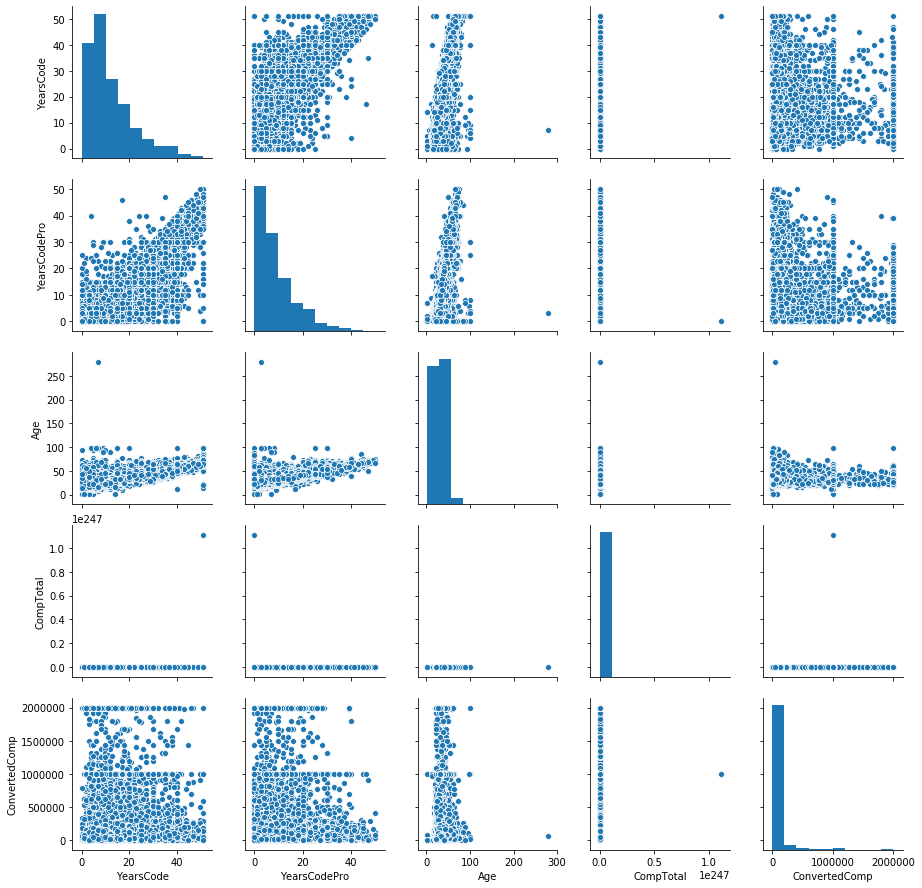

In [41]:
sns.pairplot(test)

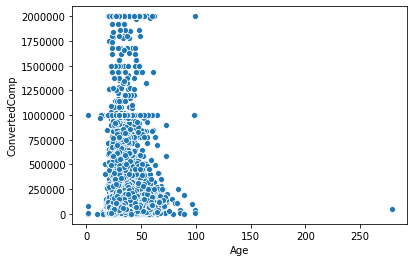

In [42]:
sns.scatterplot(x="Age", y="ConvertedComp", data=test)

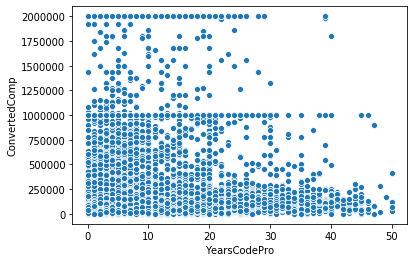

In [43]:
sns.scatterplot(x="YearsCodePro", y="ConvertedComp", data=test)

check seaborn for more plot types

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


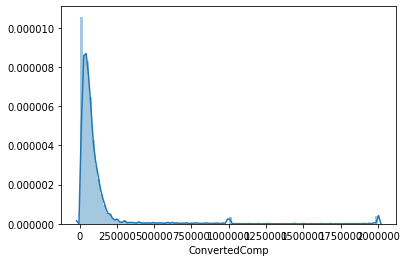

In [44]:
# salary distribution for non Null values #
sns.distplot(test["ConvertedComp"][test["ConvertedComp"].notna()],bins=100)

In [45]:
test.columns

Index(['YearsCode', 'YearsCodePro', 'Age', 'CompTotal', 'ConvertedComp',
       'Country', 'CurrencyDesc', 'DevType', 'EdLevel'],
      dtype='object')

In [46]:
# For categorical data #
#sns.boxplot(x="EdLevel", y="ConvertedComp", data=test,palette='rainbow')

## Column analysis

### Categorical cols

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      57684 non-null  float64
 1   YearsCodePro   46349 non-null  float64
 2   Age            45446 non-null  float64
 3   CompTotal      34826 non-null  float64
 4   ConvertedComp  34756 non-null  float64
 5   Country        64072 non-null  object 
 6   CurrencyDesc   45472 non-null  object 
 7   DevType        49370 non-null  object 
 8   EdLevel        57431 non-null  object 
dtypes: float64(5), object(4)
memory usage: 4.4+ MB


**Country col**

In [48]:
test["Country"].unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic',
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Kyrgyzstan', 'Iran', 'Croatia', 'Egypt', 'Argentina',
       'Ghana', 'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guat

In [49]:
test["Country"].value_counts()

United States     12469
India              8403
United Kingdom     3896
Germany            3890
Canada             2191
                  ...  
Nauru                 1
North Korea           1
Kiribati              1
Grenada               1
Chad                  1
Name: Country, Length: 183, dtype: int64

No real way to fill in country data. The country is either in there, or its not

In [50]:
# Number of NaN values for Country col # 
len(test[test["Country"].isna()])

389

In [51]:
# Number of entries left if I drop rows where Country col has an NaN value #
len(test.dropna(subset=["Country"]))

64072

In [52]:
# Drop NaN in the Country col #
test.dropna(subset=["Country"], inplace=True)

In [53]:
# Check for NaN values #
len(test[test["Country"].isna()])

0

**DevType**

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64072 entries, 0 to 64460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      57684 non-null  float64
 1   YearsCodePro   46349 non-null  float64
 2   Age            45446 non-null  float64
 3   CompTotal      34826 non-null  float64
 4   ConvertedComp  34756 non-null  float64
 5   Country        64072 non-null  object 
 6   CurrencyDesc   45472 non-null  object 
 7   DevType        49370 non-null  object 
 8   EdLevel        57431 non-null  object 
dtypes: float64(5), object(4)
memory usage: 4.9+ MB


In [55]:
test["DevType"].unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

In [56]:
test["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                              4424
Developer, back-end                                                                                                                                                                                                                                                                3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                     2227
Developer, back-end;Developer, full-stack                                                                                                                       

In [57]:
# Number of NaN in DevType col #
len(test[test["DevType"].isna()])

14702

In [58]:
test["DevType"][0]

'Developer, desktop or enterprise applications;Developer, full-stack'

In [59]:
test["DevType"][1]

'Developer, full-stack;Developer, mobile'

In [60]:
test["DevType"].head(10)

0    Developer, desktop or enterprise applications;...
1              Developer, full-stack;Developer, mobile
2                                                  NaN
3                                                  NaN
4                                                  NaN
5      Designer;Developer, front-end;Developer, mobile
6    Developer, back-end;Developer, front-end;Devel...
7    Developer, back-end;Developer, desktop or ente...
8                                Developer, full-stack
9    Database administrator;Developer, full-stack;D...
Name: DevType, dtype: object

In [61]:
test["DevType"].str.split(";").head(10)

0    [Developer, desktop or enterprise applications...
1           [Developer, full-stack, Developer, mobile]
2                                                  NaN
3                                                  NaN
4                                                  NaN
5    [Designer, Developer, front-end, Developer, mo...
6    [Developer, back-end, Developer, front-end, De...
7    [Developer, back-end, Developer, desktop or en...
8                              [Developer, full-stack]
9    [Database administrator, Developer, full-stack...
Name: DevType, dtype: object

In [62]:
test["DevType"].str.split(";")[0]

['Developer, desktop or enterprise applications', 'Developer, full-stack']

In [63]:
# convert strings in DevType col into lists #
test["DevType"]= test["DevType"].str.split(";")

In [64]:
# for each individuall select the first option as dev type #
test["DevType"].head()

0    [Developer, desktop or enterprise applications...
1           [Developer, full-stack, Developer, mobile]
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: DevType, dtype: object

In [65]:
# grab the first element for each list iterm in the col #
test["DevType"].str[0].head(10)

0    Developer, desktop or enterprise applications
1                            Developer, full-stack
2                                              NaN
3                                              NaN
4                                              NaN
5                                         Designer
6                              Developer, back-end
7                              Developer, back-end
8                            Developer, full-stack
9                           Database administrator
Name: DevType, dtype: object

In [66]:
test["DevType"].str[0].value_counts()

Developer, back-end                              18142
Developer, full-stack                             6100
Database administrator                            3687
Academic researcher                               3552
Data or business analyst                          3370
Developer, front-end                              3213
Designer                                          2963
Developer, desktop or enterprise applications     2108
Data scientist or machine learning specialist     1936
Developer, mobile                                 1393
Developer, embedded applications or devices        820
DevOps specialist                                  389
Developer, QA or test                              358
Engineering manager                                228
Engineer, data                                     221
Developer, game or graphics                        214
System administrator                               160
Senior executive/VP                                118
Product ma

In [67]:
# for each individuall select the first option as dev type #
test["DevType"] = test["DevType"].str[0]

In [68]:
# number of options to select #
len(test["DevType"].unique())

24

In [69]:
# Rename column data by replacing some names #
test["DevType"].replace("Developer, back-end","back-end",inplace=True)
test["DevType"].replace("Developer, full-stack","full-stack",inplace=True)
test["DevType"].replace("Database administrator","Database-administrator",inplace=True)
test["DevType"].replace("Academic researcher","Academic-researcher",inplace=True)
test["DevType"].replace("Data or business analyst","Data-business-analyst",inplace=True)
test["DevType"].replace("Developer, front-end","front-end",inplace=True)
test["DevType"].replace("Developer, desktop or enterprise applications","desktop-enterprise-applications",inplace=True)
test["DevType"].replace("Data scientist or machine learning specialist","Data scientist",inplace=True)
test["DevType"].replace("Developer, mobile","mobile",inplace=True)
test["DevType"].replace("Developer, embedded applications or devices","embedded-applications-devices",inplace=True)
test["DevType"].replace("DevOps specialist","DevOps-specialist",inplace=True)
test["DevType"].replace("Developer, QA or test","QA-test",inplace=True)
test["DevType"].replace("Engineering manager","Engineering-manager",inplace=True)
test["DevType"].replace("Engineer, data","data-Engineer",inplace=True)
test["DevType"].replace("Developer, game or graphics","game-Dev",inplace=True)
test["DevType"].replace("System administrator","System-administrator",inplace=True)
test["DevType"].replace("Senior executive/VP","Senior-executive/VP",inplace=True)
test["DevType"].replace("Product manager","Product-manager",inplace=True)
test["DevType"].replace("Engineer, site reliability","Engineer-site-reliability",inplace=True)
test["DevType"].replace("Marketing or sales professional","Marketing-sales-professional",inplace=True)
test["DevType"].replace("Data scientist","Data-scientist",inplace=True)

In [70]:
test["DevType"].value_counts()

back-end                           18142
full-stack                          6100
Database-administrator              3687
Academic-researcher                 3552
Data-business-analyst               3370
front-end                           3213
Designer                            2963
desktop-enterprise-applications     2108
Data-scientist                      1936
mobile                              1393
embedded-applications-devices        820
DevOps-specialist                    389
QA-test                              358
Engineering-manager                  228
data-Engineer                        221
game-Dev                             214
System-administrator                 160
Senior-executive/VP                  118
Product-manager                       95
Scientist                             86
Educator                              83
Engineer-site-reliability             82
Marketing-sales-professional          52
Name: DevType, dtype: int64

In [71]:
# check for NaN #
len(test[test["DevType"].isna()])

14702

Fill NaN values with:
    
    padding max=2
    highest Frequency

In [72]:
# Padding dataframe #
test["DevType"].interpolate(method="pad",limit=2, inplace=True)

In [73]:
# Check for NaN #
len(test[test["DevType"].isna()])

2046

In [74]:
# highest frequency #
test["DevType"].mode()[0]

'back-end'

In [75]:
# fillna using highest frequency #
test["DevType"].fillna(test["DevType"].mode()[0],inplace=True)

In [76]:
# Check for NaN #
len(test[test["DevType"].isna()])

0

In [77]:
test["DevType"].value_counts()

back-end                           24840
full-stack                          7707
Database-administrator              4541
Academic-researcher                 4504
Data-business-analyst               4234
front-end                           4043
Designer                            3737
desktop-enterprise-applications     2640
Data-scientist                      2410
mobile                              1753
embedded-applications-devices       1020
DevOps-specialist                    498
QA-test                              447
Engineering-manager                  287
data-Engineer                        279
game-Dev                             266
System-administrator                 212
Senior-executive/VP                  151
Product-manager                      124
Educator                             108
Engineer-site-reliability            104
Scientist                            102
Marketing-sales-professional          65
Name: DevType, dtype: int64

**EdLevel**

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64072 entries, 0 to 64460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      57684 non-null  float64
 1   YearsCodePro   46349 non-null  float64
 2   Age            45446 non-null  float64
 3   CompTotal      34826 non-null  float64
 4   ConvertedComp  34756 non-null  float64
 5   Country        64072 non-null  object 
 6   CurrencyDesc   45472 non-null  object 
 7   DevType        64072 non-null  object 
 8   EdLevel        57431 non-null  object 
dtypes: float64(5), object(4)
memory usage: 6.9+ MB


In [79]:
test["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [80]:
test["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [81]:
# Shorten the data #
test["EdLevel"].replace("Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Bachelors-degree",inplace=True)
test["EdLevel"].replace("Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Masters-degree",inplace=True)
test["EdLevel"].replace("Some college/university study without earning a degree","college/university-no-degree",inplace=True)
test["EdLevel"].replace("Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","High-school",inplace=True)
test["EdLevel"].replace("Associate degree (A.A., A.S., etc.)","Associate-degree",inplace=True)
test["EdLevel"].replace("Other doctoral degree (Ph.D., Ed.D., etc.)","doctora-degree",inplace=True)
test["EdLevel"].replace("Primary/elementary school","Primary/elementary-school",inplace=True)
test["EdLevel"].replace("Professional degree (JD, MD, etc.)","Professional-degree",inplace=True)
test["EdLevel"].replace("I never completed any formal education","no-formal-education",inplace=True)

In [82]:
test["EdLevel"].value_counts()

Bachelors-degree                26542
Masters-degree                  13112
college/university-no-degree     7239
High-school                      4771
Associate-degree                 1843
doctora-degree                   1690
Primary/elementary-school         941
Professional-degree               800
no-formal-education               493
Name: EdLevel, dtype: int64

Fill NaN values with:
    
    padding max=2
    highest Frequency

In [83]:
# number of NaN #
len(test[test["EdLevel"].isna()])

6641

In [84]:
# padding #
test["EdLevel"].interpolate(method="pad",limit=2, inplace=True)

In [85]:
# number of NaN #
len(test[test["EdLevel"].isna()])

714

In [86]:
# Highest frequency #
test["EdLevel"].mode()[0]

'Bachelors-degree'

In [87]:
# Fill NaN with Highest Frequency #
test["EdLevel"].fillna(test["EdLevel"].mode()[0],inplace=True)

In [88]:
# number of NaN #
len(test[test["EdLevel"].isna()])

0

## Numerical cols

In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64072 entries, 0 to 64460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      57684 non-null  float64
 1   YearsCodePro   46349 non-null  float64
 2   Age            45446 non-null  float64
 3   CompTotal      34826 non-null  float64
 4   ConvertedComp  34756 non-null  float64
 5   Country        64072 non-null  object 
 6   CurrencyDesc   45472 non-null  object 
 7   DevType        64072 non-null  object 
 8   EdLevel        64072 non-null  object 
dtypes: float64(5), object(4)
memory usage: 6.9+ MB


**CompTotal and ConvertedComp**

In [90]:
# Show Salary when ConvertedComp = NaN #
test.loc[(test["ConvertedComp"].isna()) & (test["CompTotal"].notna()),["Country","CompTotal","ConvertedComp"]].head(10)

,Country,CompTotal,ConvertedComp
278,Canada,1.700000e+04,NaN
478,Canada,0.000000e+00,NaN
792,United States,2.500000e+05,NaN
1519,Canada,9.500000e+04,NaN
1657,United States,6.800000e+04,NaN
1711,Spain,5.000000e+04,NaN
2488,United States,1.000000e+15,NaN
3088,United States,1.560000e+05,NaN
3396,United States,1.000030e+05,NaN
4490,United States,1.800000e+05,NaN


In [91]:
# number of salaries we need to convert #
len(test.loc[(test["ConvertedComp"].isna()) & (test["CompTotal"].notna()),["Country","CompTotal","ConvertedComp"]])

70

In [92]:
test["CompTotal"].dtype

dtype('float64')

In [93]:
# list contries we have to convert salary #
test.loc[(test["ConvertedComp"].isna()) & (test["CompTotal"].notna()),"Country"].unique()

array(['Canada', 'United States', 'Spain', 'Australia', 'India', 'Angola',
       'United Kingdom', 'Indonesia', 'South Africa', 'Belarus',
       'Ireland', 'Germany', 'Nigeria', 'Russian Federation', 'France',
       'Denmark', 'Norway', 'Czech Republic', 'Uruguay', 'Netherlands',
       'Pakistan', 'Belgium', 'Singapore', 'Austria', 'Ukraine'],
      dtype=object)

In [94]:
test.loc[(test["ConvertedComp"].isna()) & (test["CompTotal"].notna()),["Country","CurrencyDesc"]]   

,Country,CurrencyDesc
278,Canada,Canadian dollar
478,Canada,Canadian dollar
792,United States,United States dollar
1519,Canada,Canadian dollar
1657,United States,United States dollar
...,...,...
59191,Canada,Canadian dollar
60671,United States,United States dollar
60951,Ukraine,United States dollar
61034,India,Indian rupee


In [95]:
# the number of entries to convert represented as a percentage of the whole dataframe #
(70/64072)*100

0.10925209139717817

In [96]:
# drop all rows from the dataframe where ConvertedComp == NaN #
test.dropna(subset=["ConvertedComp"], inplace=True)

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      34630 non-null  float64
 1   YearsCodePro   34621 non-null  float64
 2   Age            30596 non-null  float64
 3   CompTotal      34756 non-null  float64
 4   ConvertedComp  34756 non-null  float64
 5   Country        34756 non-null  object 
 6   CurrencyDesc   34756 non-null  object 
 7   DevType        34756 non-null  object 
 8   EdLevel        34756 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.7+ MB


**YearCode col**

    Pad max = 2
    use mean/mode depending on circumstance

In [98]:
len(test["YearsCode"][test["YearsCode"].isna()])

126

In [99]:
# Padding #
test["YearsCode"].interpolate(method="pad",limit=2,inplace=True)

In [100]:
len(test["YearsCode"][test["YearsCode"].isna()])

0

In [101]:
# No NaN #
test["YearsCode"].unique()

array([17.,  8., 10.,  7., 35.,  5., 37., 19.,  9., 30.,  4., 20., 25.,
       16., 36.,  6., 43., 23., 11., 38., 33., 24., 21., 13.,  2.,  3.,
       40., 15., 27., 12., 46., 14., 22., 18., 28., 32., 44., 26., 42.,
       34., 31., 29.,  1., 41., 51., 47., 39.,  0., 45., 50., 48., 49.])

**YearsCodePro Col**

    Pad max = 2
    use mean/mode depending on circumstance

In [102]:
len(test["YearsCodePro"][test["YearsCodePro"].isna()])

135

In [103]:
# Padding #
test["YearsCodePro"].interpolate(method="pad",limit=2, inplace=True)

In [104]:
len(test["YearsCodePro"][test["YearsCodePro"].isna()])

0

In [105]:
# No NaN #
test["YearsCodePro"].unique()

array([13.,  4.,  2.,  7., 20.,  1., 23.,  3., 12., 10., 14., 29.,  6.,
       28.,  8., 15., 11., 25.,  0.,  5.,  9., 21., 16., 19., 35., 18.,
       24., 32., 22., 30., 38., 26., 17., 27., 40., 33., 34., 36., 39.,
       37., 31., 41., 45., 47., 50., 42., 43., 44., 48., 46., 49.])

**Age col**

    Pad max = 2
    use mean/mode depending on circumstance

In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      34756 non-null  float64
 1   YearsCodePro   34756 non-null  float64
 2   Age            30596 non-null  float64
 3   CompTotal      34756 non-null  float64
 4   ConvertedComp  34756 non-null  float64
 5   Country        34756 non-null  object 
 6   CurrencyDesc   34756 non-null  object 
 7   DevType        34756 non-null  object 
 8   EdLevel        34756 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.7+ MB


In [107]:
len(test[test["Age"].isna()])

4160

In [108]:
test["Age"].unique()

array([ 36. ,  22. ,  23. ,  49. ,  53. ,  27. ,  45. ,  25. ,  32. ,
        24. ,   nan,  31. ,  39. ,  34. ,  35. ,  38. ,  28. ,  44. ,
        48. ,  20. ,  26. ,  42. ,  21. ,  29. ,  30. ,  41. ,  37. ,
        63. ,  33. ,  43. ,  40. ,  51. ,  57. ,  60. ,  50. ,  59. ,
        62. ,  52. ,  46. ,  49.5,  56. ,  47. ,  19. ,  54. ,  70. ,
        55. ,  61. ,  18. ,  26.8,  64. ,  58. ,  65. ,  84. ,  73. ,
        17. ,  99. ,  68. ,  74. ,  69. ,  16. ,  85. ,  32.5,  66. ,
        23.8,  72. ,  67. ,  96. ,  79. , 279. ,  22.5,  27.5,  15. ,
        89. ,   1. ,  98. ,  10. ,  13. ,  78. ,  31.5,  39.5,  71. ,
        81. ,  83. ,  12. ,  75. ])

In [109]:
# Padding #
test["Age"].interpolate(method="pad",limit=2,inplace=True)

In [110]:
len(test[test["Age"].isna()])

685

In [111]:
# mean #
test["Age"].mean()

32.15334448651346

In [112]:
# mode #
test["Age"].mode()[0]

30.0

We want ages to be whole numbers so we will use the mode not the mean

In [113]:
test["Age"].fillna(test["Age"].mode()[0], inplace=True)

In [114]:
len(test[test["Age"].isna()])

0

In [115]:
test["Age"].unique()

array([ 36. ,  22. ,  23. ,  49. ,  53. ,  27. ,  45. ,  25. ,  32. ,
        24. ,  31. ,  39. ,  34. ,  35. ,  38. ,  28. ,  44. ,  48. ,
        20. ,  26. ,  42. ,  21. ,  29. ,  30. ,  41. ,  37. ,  63. ,
        33. ,  43. ,  40. ,  51. ,  57. ,  60. ,  50. ,  59. ,  62. ,
        52. ,  46. ,  49.5,  56. ,  47. ,  19. ,  54. ,  70. ,  55. ,
        61. ,  18. ,  26.8,  64. ,  58. ,  65. ,  84. ,  73. ,  17. ,
        99. ,  68. ,  74. ,  69. ,  16. ,  85. ,  32.5,  66. ,  23.8,
        72. ,  67. ,  96. ,  79. , 279. ,  22.5,  27.5,  15. ,  89. ,
         1. ,  98. ,  10. ,  13. ,  78. ,  31.5,  39.5,  71. ,  81. ,
        83. ,  12. ,  75. ])

In [116]:
# make the ages whole numbers #
test["Age"].replace(49.5, 50, inplace=True)
test["Age"].replace(26.8, 27, inplace=True)
test["Age"].replace(32.5, 33, inplace=True)
test["Age"].replace(23.8, 24, inplace=True)
test["Age"].replace(22.5, 23, inplace=True)
test["Age"].replace(27.5, 28, inplace=True)
test["Age"].replace(31.5, 32, inplace=True)
test["Age"].replace(39.5, 40, inplace=True)

In [117]:
test["Age"].unique()

array([ 36.,  22.,  23.,  49.,  53.,  27.,  45.,  25.,  32.,  24.,  31.,
        39.,  34.,  35.,  38.,  28.,  44.,  48.,  20.,  26.,  42.,  21.,
        29.,  30.,  41.,  37.,  63.,  33.,  43.,  40.,  51.,  57.,  60.,
        50.,  59.,  62.,  52.,  46.,  56.,  47.,  19.,  54.,  70.,  55.,
        61.,  18.,  64.,  58.,  65.,  84.,  73.,  17.,  99.,  68.,  74.,
        69.,  16.,  85.,  66.,  72.,  67.,  96.,  79., 279.,  15.,  89.,
         1.,  98.,  10.,  13.,  78.,  71.,  81.,  83.,  12.,  75.])

In [118]:
# Ages incorrect i.e. = [1,279] # 

In [119]:
test.loc[test["Age"] == 1]

,YearsCode,YearsCodePro,Age,CompTotal,ConvertedComp,Country,CurrencyDesc,DevType,EdLevel
20042,5.0,1.0,1.0,1.000000e+11,1000000.0,Indonesia,Indonesian rupiah,Data-business-analyst,Bachelors-degree
25061,14.0,7.0,1.0,7.000000e+04,75669.0,Netherlands,European Euro,full-stack,Bachelors-degree
54687,0.0,0.0,1.0,4.000000e+00,48.0,United States,United States dollar,Academic-researcher,no-formal-education
58292,3.0,2.0,1.0,6.000000e+06,5268.0,Indonesia,Indonesian rupiah,back-end,no-formal-education


In [120]:
test["Age"].mode()[0]

30.0

In [121]:
test["Age"].replace(1,30,inplace=True)

In [122]:
test.loc[test["Age"] == 279]

,YearsCode,YearsCodePro,Age,CompTotal,ConvertedComp,Country,CurrencyDesc,DevType,EdLevel
14375,7.0,3.0,279.0,49000.0,52968.0,Netherlands,European Euro,mobile,Bachelors-degree


safe to assume age is either 27 or 29 ==> we use 28 

In [123]:
test["Age"].replace(279,28,inplace=True)

In [124]:
test["Age"].unique()

array([36., 22., 23., 49., 53., 27., 45., 25., 32., 24., 31., 39., 34.,
       35., 38., 28., 44., 48., 20., 26., 42., 21., 29., 30., 41., 37.,
       63., 33., 43., 40., 51., 57., 60., 50., 59., 62., 52., 46., 56.,
       47., 19., 54., 70., 55., 61., 18., 64., 58., 65., 84., 73., 17.,
       99., 68., 74., 69., 16., 85., 66., 72., 67., 96., 79., 15., 89.,
       98., 10., 13., 78., 71., 81., 83., 12., 75.])

In [125]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearsCode      34756 non-null  float64
 1   YearsCodePro   34756 non-null  float64
 2   Age            34756 non-null  float64
 3   CompTotal      34756 non-null  float64
 4   ConvertedComp  34756 non-null  float64
 5   Country        34756 non-null  object 
 6   CurrencyDesc   34756 non-null  object 
 7   DevType        34756 non-null  object 
 8   EdLevel        34756 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.7+ MB


**Drop unwanted cols**
1. YearsCode
2. CompTotal
3. CurrencyDesc

In [126]:
test.drop(labels=["YearsCode", "CompTotal", "CurrencyDesc"], axis=1, inplace=True)

In [127]:
test.head()

,YearsCodePro,Age,ConvertedComp,Country,DevType,EdLevel
7,13.0,36.0,116000.0,United States,back-end,Bachelors-degree
9,4.0,22.0,32315.0,United Kingdom,Database-administrator,Masters-degree
10,2.0,23.0,40070.0,United Kingdom,back-end,Bachelors-degree
11,7.0,49.0,14268.0,Spain,Designer,college/university-no-degree
12,20.0,53.0,38916.0,Netherlands,Designer,High-school


In [128]:
test.rename(columns = {"ConvertedComp": "Salary"}, inplace=True)

In [129]:
test.reset_index(drop="index",inplace=True)

In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34756 entries, 0 to 34755
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  34756 non-null  float64
 1   Age           34756 non-null  float64
 2   Salary        34756 non-null  float64
 3   Country       34756 non-null  object 
 4   DevType       34756 non-null  object 
 5   EdLevel       34756 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.6+ MB


In [131]:
salaries = test.copy() 

In [132]:
salaries.head()

,YearsCodePro,Age,Salary,Country,DevType,EdLevel
0,13.0,36.0,116000.0,United States,back-end,Bachelors-degree
1,4.0,22.0,32315.0,United Kingdom,Database-administrator,Masters-degree
2,2.0,23.0,40070.0,United Kingdom,back-end,Bachelors-degree
3,7.0,49.0,14268.0,Spain,Designer,college/university-no-degree
4,20.0,53.0,38916.0,Netherlands,Designer,High-school


In [133]:
# save final df #
# salaries.to_csv("salaries.csv")

In [134]:
# Load saved dataframe #
# test2 = pd.read_csv("salaries.csv")
# test2.head()

In [142]:
salaries["Country"].value_counts().head(10)

United States     8152
India             2668
United Kingdom    2588
Germany           2311
Canada            1345
Brazil            1157
France            1127
Netherlands        810
Poland             798
Australia          772
Name: Country, dtype: int64